In [107]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [108]:
#Load data
dataset_raw = pd.read_csv("insurance.csv")
dataset = dataset_raw.copy()
print(dataset.describe)
dataset

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0, 0.5, 'BMI Values')

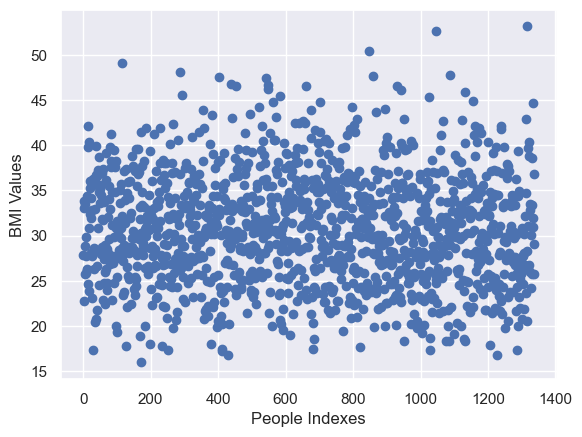

In [109]:
#EDA 
sns.set_theme()
#The distrubiton of BMI
bmi = dataset.iloc[:,2]
dataset_indexes = dataset.index.values.tolist()


plt.scatter(dataset_indexes,bmi)
plt.xlabel("People Indexes") 
plt.ylabel("BMI Values")



/Users/berkeela/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


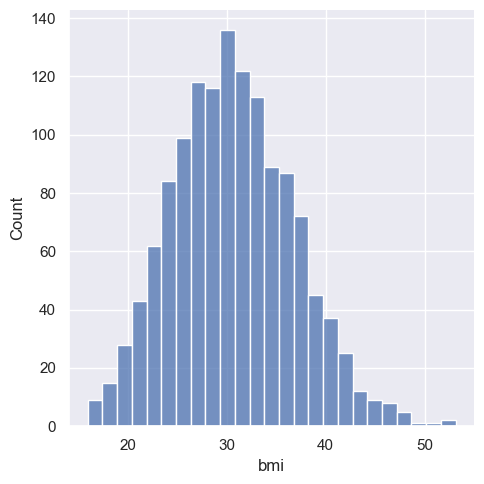

In [110]:
#for any kind of distribution the distplot of seaborn should be fine
sns.displot(bmi)

<BarContainer object of 1338 artists>

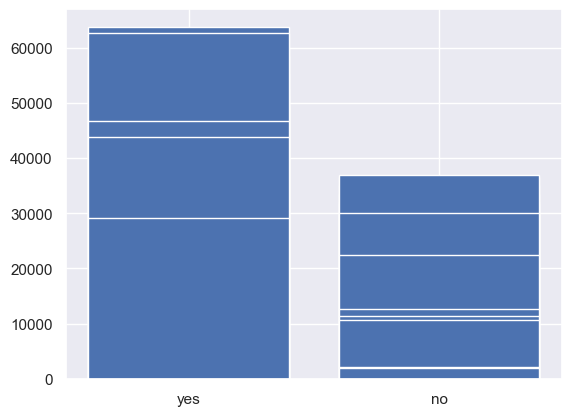

In [111]:
#Relationship between smokers and charges
smokers = dataset.iloc[:,4]
charges = dataset.iloc[:,6]

plt.bar(smokers,charges)


<Axes: xlabel='population', ylabel='smoker'>

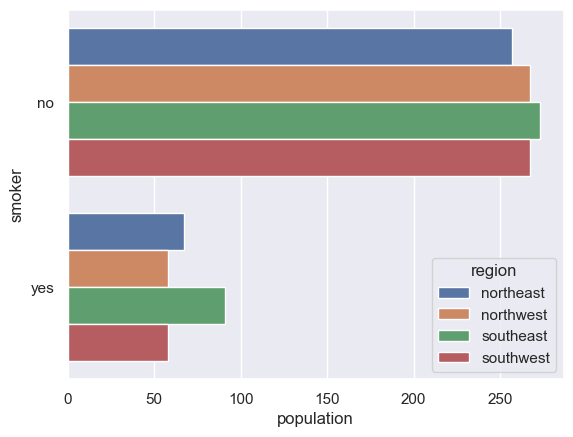

In [112]:
#Relationship between smokers and region
# it is quite har to visualize two categorical datas relationship so to make it a little bit easier the population attribute added

regions_and_population = dataset.groupby(['smoker','region']).size().reset_index()
regions_and_population = regions_and_population.rename(columns={0:"population"})
sns.barplot(data = regions_and_population,x = 'population' , y = "smoker", hue= "region")

<Axes: ylabel='bmi'>

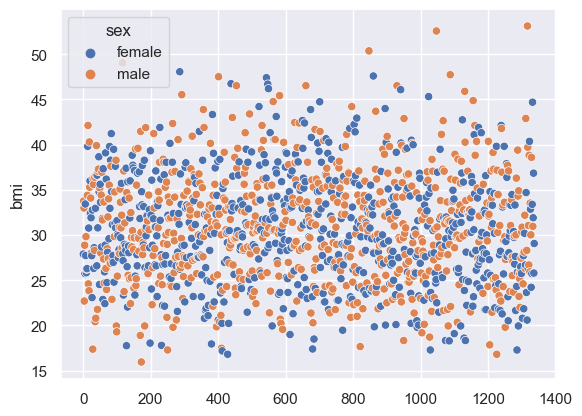

In [113]:
#Relationship between sex and bmi
#the chart is representing us the relationship between bmi and sex over every data in dataset. As you can see sex attribute classified over two color

sex = dataset.iloc[:,1]
sns.scatterplot(data= dataset,x = dataset_indexes, y = 'bmi', hue= 'sex')



,region,children
0,northeast,339
1,northwest,373
2,southeast,382
3,southwest,371


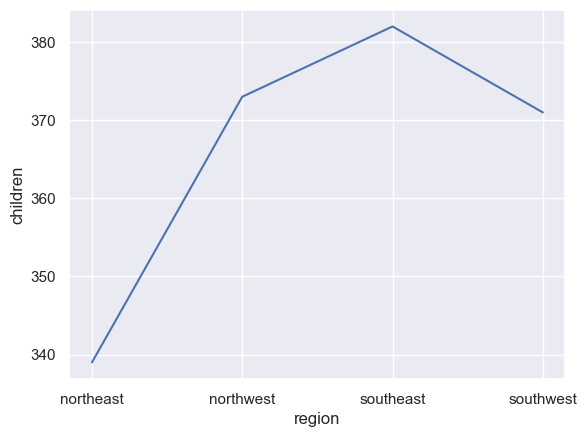

In [114]:
#Finding the region with the most children
region_and_child_population = dataset.groupby(['region'])['children'].sum().reset_index()


sns.lineplot(data = region_and_child_population, x = 'region', y = 'children')
region_and_child_population

#Clearly the southeast region is the region with the most children


/Users/berkeela/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


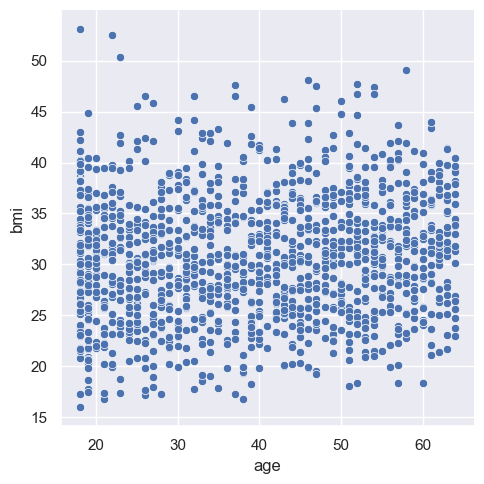

In [115]:
#Realation between age and bmi
age = dataset.iloc[:,0]
sns.relplot(x= age , y = bmi)
#we can see the bmi distribution on age attribute


<Axes: xlabel='children', ylabel='bmi'>

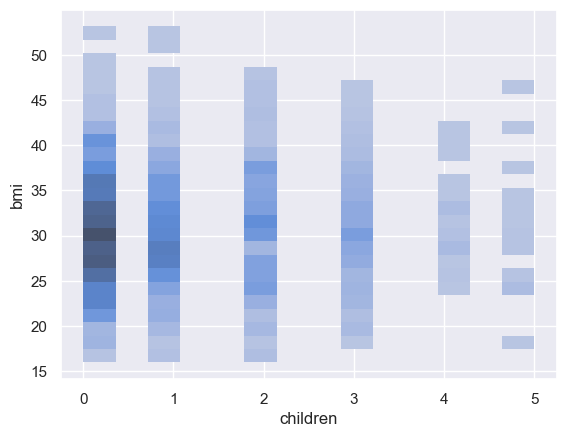

In [116]:
#the relation between children and bmi
children = dataset.iloc[:,3]
sns.histplot(data = dataset, x =children, y = bmi)


<Axes: >

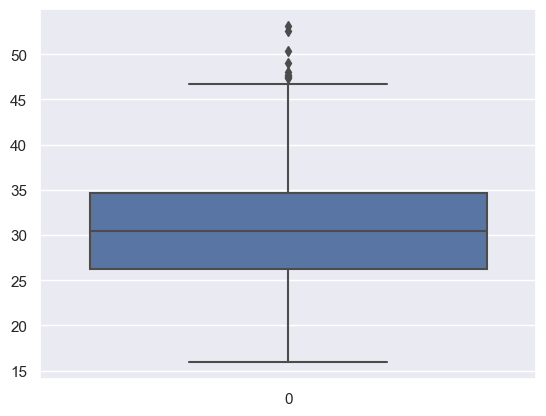

In [117]:
# is there an outlier in the bmi variable ?
# actually yes if we look the first chart, we can see the outliers that is not suitable with other data points
# also we can see the outliers using boxplots

sns.boxplot(bmi)

<Axes: xlabel='bmi', ylabel='charges'>

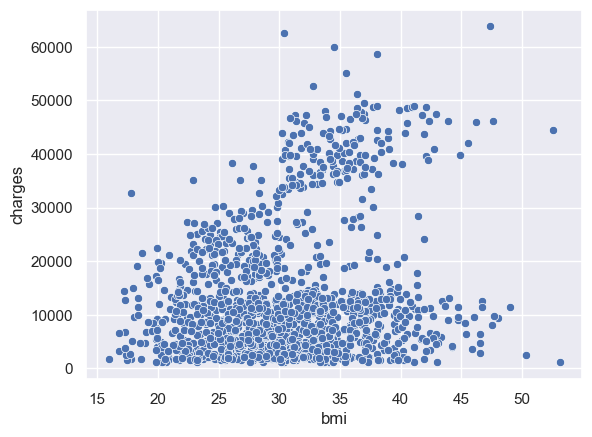

In [118]:
# The relationhip between bmi and charges
# Here we can see the distribution of the bmi over charges

sns.scatterplot(data=dataset,x="bmi", y="charges")

/Users/berkeela/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


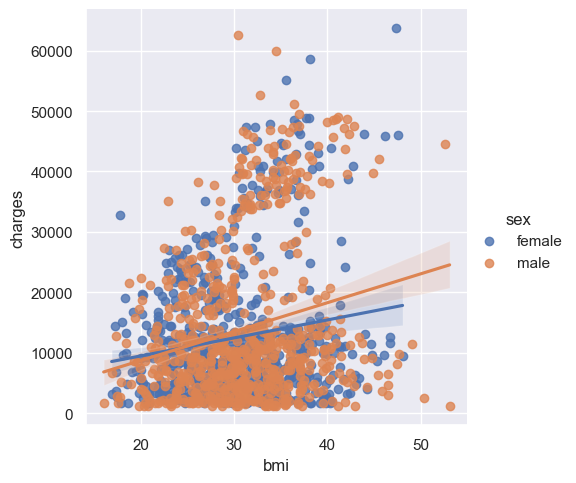

In [119]:
#also we can add this formula the sex and make it easier to assignation
sns.lmplot(data=dataset,x="bmi", y="charges", hue="sex")


/Users/berkeela/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


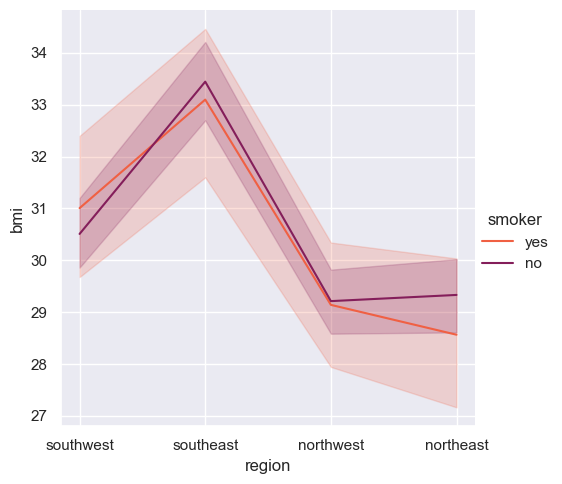

In [120]:
#When examining the relationship between region , smoker and bmi we can use an advanced relplot
sns.relplot(data=dataset, x="region", y="bmi",hue="smoker", kind="line",palette="rocket_r")

In [121]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#Data Preprocessing

labelencoder = LabelEncoder()

dataset.dropna(inplace = True)

dataset["sex"] = labelencoder.fit_transform(dataset["sex"])

dataset["region"] = labelencoder.fit_transform(dataset["region"])

dataset["smoker"] = labelencoder.fit_transform(dataset["smoker"])

scaler = preprocessing.MinMaxScaler()
normalized_dataset = scaler.fit_transform(dataset)
normalized_dataset = pd.DataFrame(normalized_dataset, columns = dataset.columns)

y = normalized_dataset["charges"]
X = normalized_dataset.drop(['charges'], axis=1)
#split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


print(normalized_dataset)


           age  sex       bmi  children  smoker    region   charges
0     0.021739  0.0  0.321227       0.0     1.0  1.000000  0.251611
1     0.000000  1.0  0.479150       0.2     0.0  0.666667  0.009636
2     0.217391  1.0  0.458434       0.6     0.0  0.666667  0.053115
3     0.326087  1.0  0.181464       0.0     0.0  0.333333  0.333010
4     0.304348  1.0  0.347592       0.0     0.0  0.333333  0.043816
...        ...  ...       ...       ...     ...       ...       ...
1333  0.695652  1.0  0.403820       0.6     0.0  0.333333  0.151299
1334  0.000000  0.0  0.429379       0.0     0.0  0.000000  0.017305
1335  0.000000  0.0  0.562012       0.0     0.0  0.666667  0.008108
1336  0.065217  0.0  0.264730       0.0     0.0  1.000000  0.014144
1337  0.934783  0.0  0.352704       0.0     1.0  0.333333  0.447249

[1338 rows x 7 columns]


Cross-Validation scores of the linear regression: [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
Cross-Validation scores of the polynomal regression: [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
Cross-Validation scores of the gradient boosting regression: [0.87517727 0.79159372 0.89421298 0.84897437 0.85976211]
Cross-Validation scores of the decision tree regression: [0.76631471 0.63169857 0.75286481 0.73751931 0.67579952]
Cross-Validation scores of the random forest regression: [0.85375688 0.77122367 0.86900109 0.82634421 0.84692578]
Mean Score of the linear regression = 0.7473
Mean Score of the polynomal regression = 0.7473
Mean Score of the gradient boost regression = 0.8539
Mean Score of the desicion tree regression = 0.7128
Mean Score of the random forest regression = 0.8335


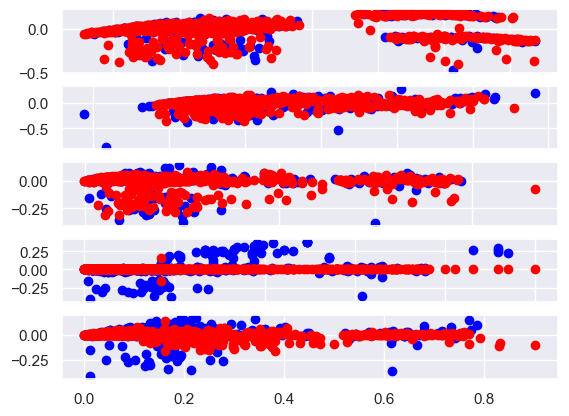

In [122]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Definition of the regression models (our target value is not a categorical value contrary it's a continuous value)
linear_regression = linear_model.LinearRegression()
polynomal_regression = linear_model.LinearRegression()
gradient_boosting_regression = GradientBoostingRegressor()
decision_tree_regression = DecisionTreeRegressor()
random_forest_regression = RandomForestRegressor()
#Configurations for Polynomal Regression 
degree = 4
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Fitting the training data
polynomal_regression.fit(X_train_poly,y_train)
linear_regression.fit(X_train,y_train)
gradient_boosting_regression.fit(X_train,y_train)
decision_tree_regression.fit(X_train,y_train)
random_forest_regression.fit(X_train,y_train)

#Visualize the predictions
fig, axs = plt.subplots(5)
axs[0].scatter(linear_regression.predict(X_test),linear_regression.predict(X_test) - y_test,color="blue",label='Test data')
axs[0].scatter(linear_regression.predict(X_train),linear_regression.predict(X_train) - y_train,color="red",label='Train data')

axs[1].scatter(polynomal_regression.predict(X_test_poly),polynomal_regression.predict(X_test_poly) - y_test,color="blue",label='Test data')
axs[1].scatter(polynomal_regression.predict(X_train_poly),polynomal_regression.predict(X_train_poly) - y_train,color="red",label='Train data')

axs[2].scatter(gradient_boosting_regression.predict(X_test),gradient_boosting_regression.predict(X_test) - y_test,color="blue",label='Test data')
axs[2].scatter(gradient_boosting_regression.predict(X_train),gradient_boosting_regression.predict(X_train) - y_train,color="red",label='Train data')

axs[3].scatter(decision_tree_regression.predict(X_test),decision_tree_regression.predict(X_test) - y_test,color="blue",label='Test data')
axs[3].scatter(decision_tree_regression.predict(X_train),decision_tree_regression.predict(X_train) - y_train,color="red",label='Train data')

axs[4].scatter(random_forest_regression.predict(X_test),random_forest_regression.predict(X_test) - y_test,color="blue",label='Test data')
axs[4].scatter(random_forest_regression.predict(X_train),random_forest_regression.predict(X_train) - y_train,color="red",label='Train data')

#Cross-validation
scores_linear = cross_val_score(linear_regression, X, y)
scores_polynomal = cross_val_score(polynomal_regression, X, y)
scores_gradient_boosting = cross_val_score(gradient_boosting_regression, X, y )
scores_desicion_tree = cross_val_score(decision_tree_regression, X, y )
scores_random_forest = cross_val_score(random_forest_regression, X, y )

print(f"Cross-Validation scores of the linear regression: {scores_linear}")
print(f"Cross-Validation scores of the polynomal regression: {scores_polynomal}")
print(f"Cross-Validation scores of the gradient boosting regression: {scores_gradient_boosting}")
print(f"Cross-Validation scores of the decision tree regression: {scores_desicion_tree}")
print(f"Cross-Validation scores of the random forest regression: {scores_random_forest}")

mean_score_linear = scores_linear.mean()
print(f"Mean Score of the linear regression = {mean_score_linear:.4f}")

mean_score_polynomal = scores_polynomal.mean()
print(f"Mean Score of the polynomal regression = {mean_score_polynomal:.4f}")

mean_score_gradient_boosting = scores_gradient_boosting.mean()
print(f"Mean Score of the gradient boost regression = {mean_score_gradient_boosting:.4f}")

mean_score_decision_tree = scores_desicion_tree.mean()
print(f"Mean Score of the desicion tree regression = {mean_score_decision_tree:.4f}")

mean_score_random_forest = scores_random_forest.mean()
print(f"Mean Score of the random forest regression = {mean_score_random_forest:.4f}")

#Best one in this situation is the gradient boost regression, I am choosing that one but just to see performans i implemented other ones too


In [123]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

#Declare the optimizer parameters
grid_linear_parameters = {'n_jobs' : [2,3,4,5,6],'fit_intercept': [True, False]}
randomized_gredient_boosting_parameters = {'learning_rate': sp_randFloat(),'n_estimators' : sp_randInt(100, 1000),'max_depth': sp_randInt(1, 10)}
grid_polynomal_parameters = {'fit_intercept': [True, False]}
decision_tree_parameters = {'max_depth': [5, 10, 15],'min_samples_split': [2, 5, 10, 20],'min_samples_leaf': [1, 2, 4, 8],'max_features': ['sqrt', 'log2', None]}
random_forest_parameters = {'n_estimators': [100, 200, 300],'max_depth': [5, 10, 15, 20],'min_samples_split': [2, 5, 10, 20],'min_samples_leaf': [1, 2, 4, 8],'max_features': [None, 'sqrt', 'log2']}

#Detecting the best parameters and scores
random_gradient_boosting = RandomizedSearchCV(estimator=gradient_boosting_regression, param_distributions = randomized_gredient_boosting_parameters,cv = 2, n_iter = 10, n_jobs=-1)
random_gradient_boosting.fit(X_train, y_train)

print("Best Score for Grdient Boosting Regression:", random_gradient_boosting.best_score_)
print("Best Hyperparameters for Grdient Boosting Regression:", random_gradient_boosting.best_params_)

grid_search_linear = GridSearchCV(linear_regression,grid_linear_parameters)
grid_search_linear.fit(X,y)

print("Best Hyperparameters for Linear Regression:", grid_search_linear.best_params_)
print("Best Score for Linear Regression:", grid_search_linear.best_score_)

poly_grid_search = GridSearchCV(polynomal_regression, grid_polynomal_parameters, cv=10, scoring='neg_mean_squared_error')
poly_grid_search.fit(X_train_poly,y_train)

print("Best Hyperparameters for Polynomal Regression:", poly_grid_search.best_params_)
print("Best Score for Polynomal Regression:", poly_grid_search.best_score_)

decision_tree_random_search = RandomizedSearchCV(decision_tree_regression, decision_tree_parameters, n_iter=10, cv=5, random_state=42)
decision_tree_random_search.fit(X_train,y_train)

print("Best Hyperparameters for Decision Tree Regression:", decision_tree_random_search.best_params_)
print("Best Score for Decision Tree Regression:", decision_tree_random_search.best_score_)

random_forest_random_search = RandomizedSearchCV(random_forest_regression, random_forest_parameters, cv=2, random_state=50)
random_forest_random_search.fit(X_train,y_train)

print("Best Hyperparameters for Random Forest Regression:", random_forest_random_search.best_params_)
print("Best Score for Random Forest Regression:", random_forest_random_search.best_score_)

Best Score for Grdient Boosting Regression: 0.8201346081884893
Best Hyperparameters for Grdient Boosting Regression: {'learning_rate': 0.1607533290609272, 'max_depth': 3, 'n_estimators': 136}
Best Hyperparameters for Linear Regression: {'fit_intercept': True, 'n_jobs': 2}
Best Score for Linear Regression: 0.7472559473580954
Best Hyperparameters for Polynomal Regression: {'fit_intercept': False}
Best Score for Polynomal Regression: -0.008979539904819247
Best Hyperparameters for Decision Tree Regression: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
Best Score for Decision Tree Regression: 0.7870196095076578
Best Hyperparameters for Random Forest Regression: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 20}
Best Score for Random Forest Regression: 0.859486981131582


In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Model Evaluation
linear_regression_prediction = grid_search_linear.predict(X_test)
polynomal_regression_prediction = poly_grid_search.predict(X_test_poly)
gradient_boosting_prediction = random_gradient_boosting.predict(X_test)
desicion_tree_prediction = decision_tree_random_search.predict(X_test)
random_forest_prediction = random_forest_random_search.predict(X_test)

#Mean squared error
mse_linear = mean_squared_error(y_test,linear_regression_prediction)
mse_polynomal = mean_squared_error(y_test,polynomal_regression_prediction)
mse_gradient_boosting = mean_squared_error(y_test,gradient_boosting_prediction)
mse_decision_tree = mean_squared_error(y_test,desicion_tree_prediction)
mse_random_forest = mean_squared_error(y_test,random_forest_prediction)

print(f"Mean Squarred Error of the Linear Regression: {mse_linear:.4f}")
print(f"Mean Squarred Error of the Polynomal Regression: {mse_polynomal:.4f}")
print(f"Mean Squarred Error of the Gradient Boosting Regression: {mse_gradient_boosting:.4f}")
print(f"Mean Squarred Error of the Linear Regression: {mse_linear:.4f}")
print(f"Mean Squarred Error of the Decision Tree Regression: {mse_decision_tree:.4f}")
print(f"Mean Squarred Error of the Random Forest Regression: {mse_random_forest:.4f}")

#r2 score
r2_linear = r2_score(y_test,linear_regression_prediction)
r2_polynomal = r2_score(y_test,polynomal_regression_prediction)
r2_gradient_boosting = r2_score(y_test,gradient_boosting_prediction)
r2_desicion_tree = r2_score(y_test,desicion_tree_prediction)
r2_random_forest = r2_score(y_test,random_forest_prediction)

print(f"r2 score of the Linear Regression: {r2_linear:.4f}")
print(f"r2 score of the Polynomal Regression: {r2_polynomal:.4f}")
print(f"r2 score of the Gradient Boosting Regression: {r2_gradient_boosting:.4f}")
print(f"r2 score of the Decision Tree Regression: {r2_desicion_tree:.4f}")
print(f"r2 score of the Random Forest Regression: {r2_random_forest:.4f}")



Mean Squarred Error of the Linear Regression: 0.0090
Mean Squarred Error of the Polynomal Regression: 0.0088
Mean Squarred Error of the Gradient Boosting Regression: 0.0059
Mean Squarred Error of the Linear Regression: 0.0090
Mean Squarred Error of the Decision Tree Regression: 0.0098
Mean Squarred Error of the Random Forest Regression: 0.0053
r2 score of the Linear Regression: 0.7384
r2 score of the Polynomal Regression: 0.7459
r2 score of the Gradient Boosting Regression: 0.8293
r2 score of the Decision Tree Regression: 0.7156
r2 score of the Random Forest Regression: 0.8470
